Refrence: https://www.kaggle.com/datasets/valentinjoseph/avocado-sales-20152021-us-centric

PLU4046: Hass small
PLU4225: Hass large
PLU4770: Hass extra large


QUESTIONS TO ANSWER

1. does the price have an influence on the volume?

2. which areas consumed avocados the most from 2015 to 2021?

3. the plu4770 being the biggest Hass variety, is it also the one consumed the most?

4. is the trend in the most consuming city a mirror image of the general trend in the U.S?



To address the questions regarding the influence of avocado prices on volume, consumption patterns across regions, the popularity of different avocado varieties, and the comparison between the most consuming city and the overall U.S. trend, the following approach and analysis will be undertaken:

Data Preparation: The downloaded data from hassavocadoboard.com will be compiled into a single dataset. The relevant columns including AveragePrice, TotalVolume, Year, Region, and the PLU codes will be selected for analysis.

Statistical Analysis: Statistical techniques such as correlation analysis will be performed to examine the relationship between avocado prices and the volume of avocados sold. This analysis will provide insights into the influence of prices on consumer behavior.

Consumption Patterns: The dataset will be analyzed to identify the regions that have consumed the highest volumes of avocados from 2015 to 2021. This analysis will reveal the areas with the highest avocado consumption and allow for comparisons across different regions.

Popularity of Avocado Varieties: The total volumes sold for each PLU code (4046, 4225, and 4770) will be calculated and compared to determine the most consumed variety. This analysis will shed light on whether PLU4770 (Hass extra large) is the most popular variety among consumers.

Comparison of City Trends: The city with the highest avocado consumption will be identified, and its volume trend over time will be analyzed. This trend will be compared to the overall U.S. trend by examining the total volume sold across all regions. Graphical visualizations will be used to facilitate comparisons and identify any similarities or differences.

By employing statistical inference and graphical visualization techniques, this analysis will provide insights into the relationship between avocado prices and volume, consumption patterns across regions, the popularity of different avocado varieties, and the comparison between the most consuming city and the overall U.S. trend.

In [308]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings


warnings.filterwarnings("ignore")


In [309]:
df = pd.read_csv('avocado.csv')
df.tail()


,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
41020,11/14/2021,1.851641,2326.92,350.66,5.44,0.00,825.69,702.84,0.00,0.00,Organic,2021,Wichita
41021,11/21/2021,1.004960,80092.30,18981.16,2171.01,9.36,25695.00,22357.24,1902.73,634.68,Conventional,2021,Wichita
41022,11/21/2021,1.869482,2380.46,288.29,2.17,0.00,777.66,708.36,0.00,0.00,Organic,2021,Wichita
41023,11/28/2021,1.008266,70289.47,16251.89,1464.33,6.10,21416.50,18595.17,1656.51,532.21,Conventional,2021,Wichita
41024,11/28/2021,1.866433,2211.57,220.56,18.48,0.00,628.82,581.57,0.00,0.00,Organic,2021,Wichita


In [310]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with a 'region' column

# Replace "NewYork" with "New York" in the 'region' column
df['region'] = df['region'].replace('NewYork', 'New York')

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [313]:
df1=df.copy()

In [314]:
# import pandas as pd

# # URL of the CSV file

# # Read the CSV file into a DataFrame
# population = pd.read_csv('uszips.csv')

# population.head()


In [315]:
import pandas as pd

# Assuming you have a DataFrame named 'data' containing the dataset

# Get distinct values of the 'region' column
distinct_regions = df['region'].unique()

# Convert the distinct regions to an array
distinct_regions_array = distinct_regions.tolist()

# Print the distinct regions
(distinct_regions_array)


['Albany',
 'Atlanta',
 'BaltimoreWashington',
 'BirminghamMontgomery',
 'Boise',
 'Boston',
 'BuffaloRochester',
 'California',
 'Charlotte',
 'Chicago',
 'CincinnatiDayton',
 'Columbus',
 'DallasFtWorth',
 'Denver',
 'Detroit',
 'GrandRapids',
 'GreatLakes',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'LasVegas',
 'LosAngeles',
 'Louisville',
 'Miami',
 'Midsouth',
 'Nashville',
 'New York',
 'NewOrleans',
 'Northeast',
 'Northern New England',
 'NorthernNewEngland',
 'Orlando',
 'PeoriaSpringfield',
 'Philadelphia',
 'PhoenixTucson',
 'Pittsburgh',
 'Plains',
 'Portland',
 'Providence',
 'RaleighGreensboro',
 'RichmondNorfolk',
 'Roanoke',
 'Sacramento',
 'SanDiego',
 'SanFrancisco',
 'Seattle',
 'SouthCarolina',
 'SouthCentral',
 'Southeast',
 'Spokane',
 'StLouis',
 'Syracuse',
 'Tampa',
 'Toledo',
 'TotalUS',
 'West',
 'WestTexNewMexico',
 'Wichita']


# Filter the dataset for the specified regions  &
# Separate the broader regions

In [316]:
import pandas as pd


# Create an array of regions
regions = ['Albany', 'Atlanta', 'BaltimoreWashington', 'BirminghamMontgomery', 'Boise', 'Boston', 'BuffaloRochester',
            'Charlotte', 'Chicago', 'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver', 'Detroit',
           'GrandRapids', 'HarrisburgScranton', 'HartfordSpringfield', 'Houston', 'Indianapolis',
           'Jacksonville', 'LasVegas', 'LosAngeles', 'Louisville', 'Miami', 'Nashville', 'New York',
           'NewOrleans', 'Northern New England', 'NorthernNewEngland', 'Orlando', 'PeoriaSpringfield',
           'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Portland', 'Providence', 'RaleighGreensboro',
           'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
            'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'Toledo', 
           'WestTexNewMexico', 'Wichita']


filtered_data = df[df['region'].isin(regions)]




In [282]:
# broader_regions_data = filtered_data[filtered_data['region'].isin(['TotalUS', 'California',
#     'SouthCentral', 'NorthEast'])]


In [317]:
df=filtered_data.copy()

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34527 entries, 0 to 41024
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          34527 non-null  datetime64[ns]
 1   AveragePrice  34527 non-null  float64       
 2   TotalVolume   34527 non-null  float64       
 3   plu4046       34527 non-null  float64       
 4   plu4225       34527 non-null  float64       
 5   plu4770       34527 non-null  float64       
 6   TotalBags     34527 non-null  float64       
 7   SmallBags     34527 non-null  float64       
 8   LargeBags     34527 non-null  float64       
 9   XLargeBags    34527 non-null  float64       
 10  type          34527 non-null  object        
 11  year          34527 non-null  int64         
 12  region        34527 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 3.7+ MB


In [319]:
import pandas as pd

# Create an empty list to store statistics
statistics_of_data = []

# Define the columns for which you want to generate statistics
columns = ['Date', 'AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770', 'TotalBags',
           'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'year', 'region']

# Iterate over the columns and calculate statistics
for col in columns:
    statistics_of_data.append((col,
                               df[col].count(),
                               f'{df[col].count() / df.shape[0] * 100:.2f}%',
                               df[col].nunique(),
                               df[col].mode().values[0],
                               df[col].min(),
                               df[col].max()
                               ))

# Create a DataFrame from the statistics list
stats_df = pd.DataFrame(statistics_of_data, columns=['Field Name', '# Records Have Values', '% Populated',
                                                     '# Unique Values', 'Most Common', 'Min Value', 'Max Value'])


# Print the summary table
print("                                             Summary Table")
(stats_df)


                                             Summary Table


,Field Name,# Records Have Values,% Populated,# Unique Values,Most Common,Min Value,Max Value
0,Date,34527,100.00%,361,2018-01-08T00:00:00.000000000,2015-01-04 00:00:00,2021-11-28 00:00:00
1,AveragePrice,34527,100.00%,20659,1.26,0.44,3.25
2,TotalVolume,34527,100.00%,34461,1954.57,84.56,5470227.08
3,plu4046,34527,100.00%,32336,0.0,0.0,2914047.44
4,plu4225,34527,100.00%,33286,0.0,0.0,2537927.26
5,plu4770,34527,100.00%,19646,0.0,0.0,303041.74
6,TotalBags,34527,100.00%,34258,0.0,0.0,2701609.82
7,SmallBags,34527,100.00%,17995,0.0,0.0,2656630.42
8,LargeBags,34527,100.00%,13947,0.0,0.0,706052.84
9,XLargeBags,34527,100.00%,5584,0.0,0.0,66814.76


# This analysis will reveal the areas with the highest avocado consumption and allow for comparisons across different regions. 

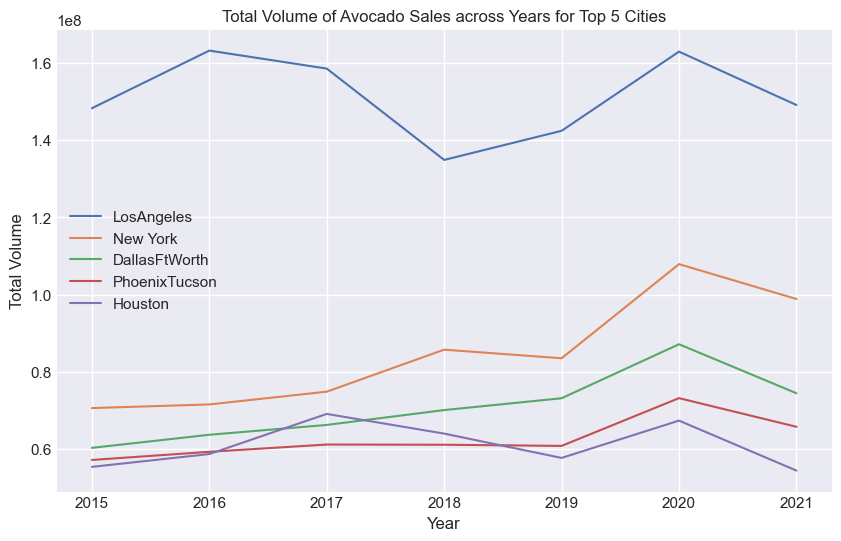

In [289]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for the top 10 cities with the highest total volume consumption
top_10_cities = df.groupby('region')['TotalVolume'].sum().nlargest(5).index
filtered_data = df[df['region'].isin(top_10_cities)]

# Group the data by year and calculate the sum of 'TotalVolume'
total_volume_by_year = filtered_data.groupby(['year', 'region'])['TotalVolume'].sum().reset_index()

# Set the plot style
plt.style.use('seaborn-darkgrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a line chart for 'TotalVolume' across each year for the top 10 cities
for city in top_10_cities:
    city_data = total_volume_by_year[total_volume_by_year['region'] == city]
    ax.plot(city_data['year'], city_data['TotalVolume'], label=city)

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total Volume')
ax.set_title('Total Volume of Avocado Sales across Years for Top 5 Cities')

# Add a legend
ax.legend()

# Show the plot
plt.show()


# The city with the highest avocado consumption is Los Angeles

# Is the trend in the most consuming city a mirror image of the general trend in the U.S?

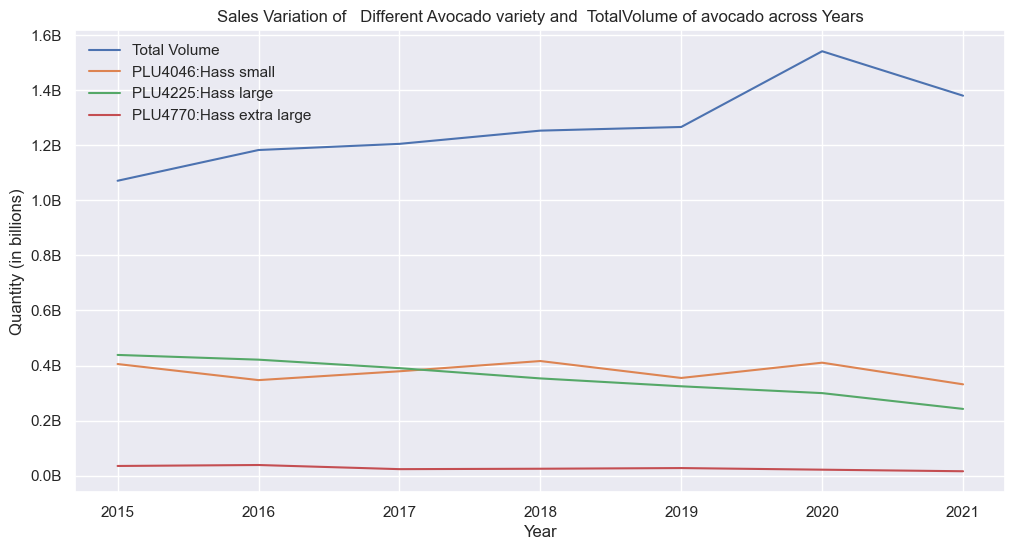

In [294]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group the data by year and calculate the sum of total volume and PLU codes
grouped_data = df.groupby('Year')[['TotalVolume', 'plu4046', 'plu4225', 'plu4770']].sum().reset_index()

# Set the plot style
sns.set(style="darkgrid")

# Plot the line plot of total volume and PLU codes across each year using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Year', y='TotalVolume', label='Total Volume')
sns.lineplot(data=grouped_data, x='Year', y='plu4046', label='PLU4046:Hass small')
sns.lineplot(data=grouped_data, x='Year', y='plu4225', label='PLU4225:Hass large')
sns.lineplot(data=grouped_data, x='Year', y='plu4770', label='PLU4770:Hass extra large')
plt.xlabel('Year')
plt.ylabel('Quantity (in billions)')
plt.title('Sales Variation of   Different Avocado variety and  TotalVolume of avocado across Years')

# Format y-axis labels to display in millions
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))

plt.legend()
plt.show()


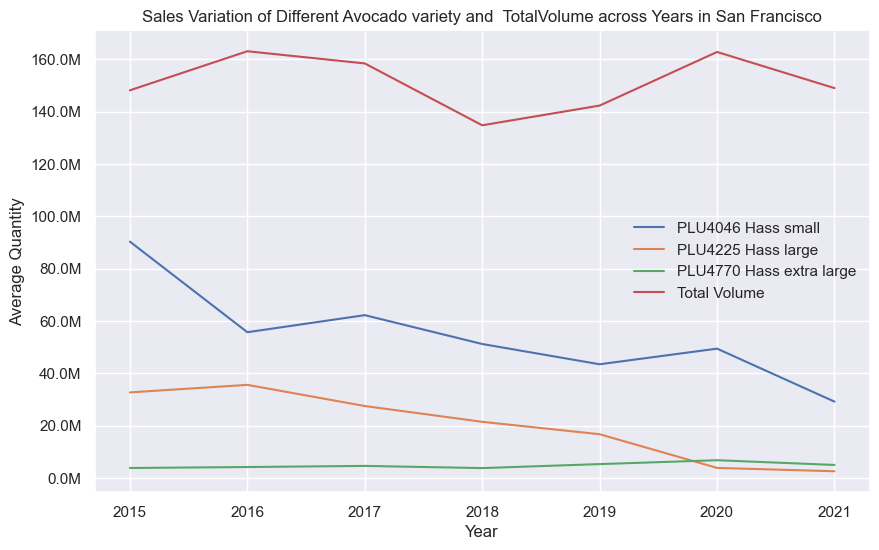

In [295]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for 'San Francisco'
filtered_data = df[df['region'] == 'LosAngeles']

# Group the data by year and calculate the average values for each PLU
plu_data = filtered_data.groupby('year')[['TotalVolume', 'plu4046', 'plu4225', 'plu4770']].sum()

# Plot the line chart
plt.figure(figsize=(10, 6))
plu_data['plu4046'].plot(label='PLU4046 Hass small')
plu_data['plu4225'].plot(label='PLU4225 Hass large')
plu_data['plu4770'].plot(label='PLU4770 Hass extra large')
plu_data['TotalVolume'].plot(label='Total Volume')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Quantity')
plt.title('Sales Variation of Different Avocado variety and  TotalVolume across Years in San Francisco')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))

# Add a legend
plt.legend()

# Show the plot
plt.show()


#  Is the trend in the most consuming city a mirror image of the general trend in the U.S?


###  Ans: No the trend is not the mirror image as we can see the TotalVolume variation acorss US is not same as when compared with Los Angeles which is most avocado consuming city

### We can  clearly see that trend in los angeles is stablize around 155 million then decreases aroung 2018 where in us trend of consumtion is mostly increasing only decreasing from 2020 to 2021

# Does the price have an influence on the volume?

In [261]:
correlation = df['AveragePrice'].corr(df['TotalVolume'])
correlation

-0.4185418242894589

#### A correlation coefficient of -0.4185 suggests a moderate negative correlation between averahe avocado prices and the volume of avocados sold.

The negative sign indicates an inverse relationship, meaning that as avocado prices increase, the volume of avocados sold tends to decrease to some extent.


However, it is important to note that correlation does not imply causation. While a negative correlation suggests an inverse relationship between avocado prices and volume, there may be other factors influencing avocado sales that need to be considered for a comprehensive analysis.

To gain further insights, it is recommended to interpret the correlation coefficient in conjunction with the scatter plot visualization of the data points. Examining the scatter plot can help identify any patterns or trends that may provide additional context to the relationship between avocado prices and sales volume.

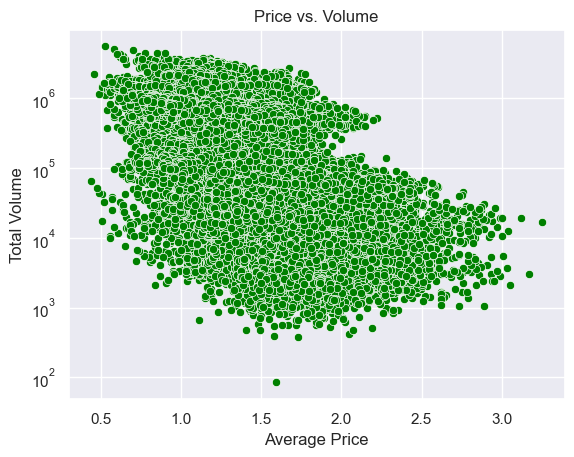

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Price vs. Volume
sns.scatterplot(data=df, x='AveragePrice', y='TotalVolume',color='green')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.title('Price vs. Volume')
plt.yscale('log')
plt.show()


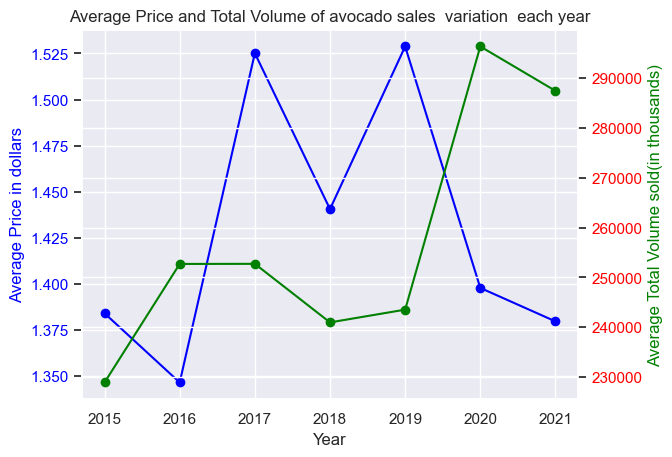

In [296]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from CSV or your dataset
# df = pd.read_csv('your_dataset.csv')

# Filter the data for the relevant columns
filtered_data = df[['year', 'AveragePrice', 'TotalVolume']]

# Group the data by year and calculate the mean of average price and total volume
grouped_data = filtered_data.groupby('year').mean()

# Create a figure and axis objects
fig, ax1 = plt.subplots()

# Plot average price on the first y-axis
ax1.plot(grouped_data.index, grouped_data['AveragePrice'], marker='o', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Price in dollars', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for average total volume
ax2 = ax1.twinx()
ax2.plot(grouped_data.index, grouped_data['TotalVolume'], marker='o', color='green')
ax2.set_ylabel('Average Total Volume sold(in thousands)', color='green')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Average Price and Total Volume of avocado sales  variation  each year')

# Show the plot
plt.show()


# Does the price have an influence on the volume?

### Ans We can see that apart from year 2019 to 2020 where price decease and Total Volume of avocado consumption increases, but for the rest years there is no significant correlation

##  To identify the regions that consumed the highest volumes of avocados from 2015 to 2021. This analysis will reveal the areas with the highest avocado consumption and allow for comparisons across different regions. 

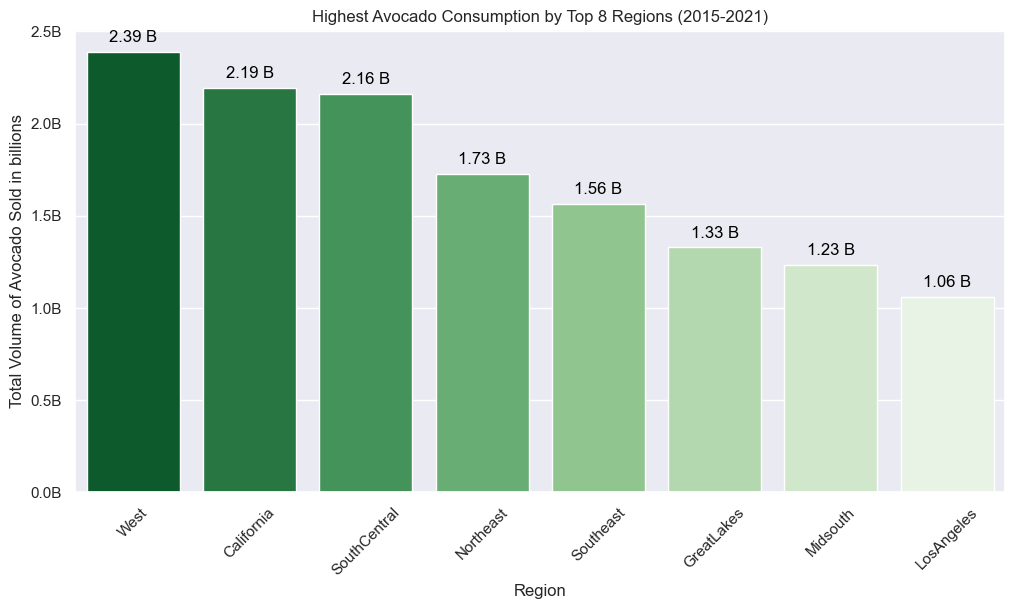

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for the years 2015 to 2021 and exclude the "TotalUS" region
filtered_data = df1[(df1['year'] >= 2015) & (df1['year'] <= 2021) & (df1['region'] != 'TotalUS')]

# Group the filtered data by region and calculate the sum of TotalVolume
consumption_by_region = filtered_data.groupby('region')['TotalVolume'].sum().reset_index()

# Sort the consumption values in descending order to find the top consuming regions
top_consumers = consumption_by_region.sort_values(by='TotalVolume', ascending=False).head(8)
num_colors = len(top_consumers)

# Create a custom color palette that varies from highest to lowest total volume
#custom_palette = sns.color_palette("Blues", n_colors=num_colors)[::-1]

# Create the bar plot with the custom color palette
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_consumers, x='region', y='TotalVolume', palette='Greens_r')

plt.xlabel('Region')
plt.ylabel('Total Volume of Avocado Sold in billions')
plt.title('Highest Avocado Consumption by Top 8 Regions (2015-2021)')


plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))

# Add total volume labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e9:.2f} B', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.show()


#  which areas consumed avocados the most from 2015 to 2021?


Ans: We can see West region , California and South Central regions consumed most avocados  and cities  Los Angeles has highest consumption of avocado approx 1.06 billions.

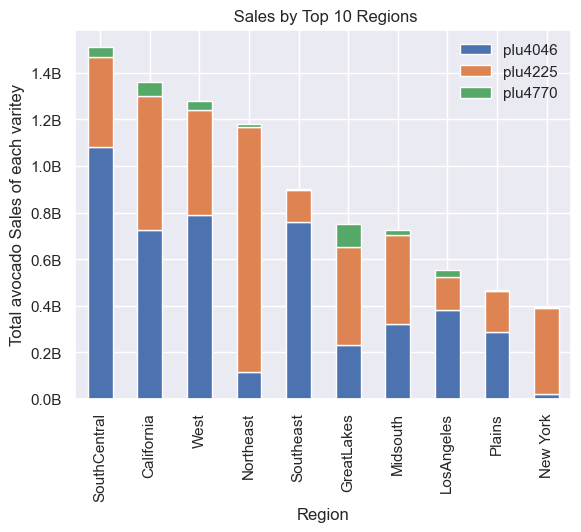

In [312]:
import pandas as pd
import matplotlib.pyplot as plt


filtered_data = df1[(df1['year'] >= 2015) & (df1['year'] <= 2021) & (df1['region'] != 'TotalUS')]

# Group the data by region and calculate the sum of each PLU
plu_totals = filtered_data.groupby('region')[['plu4046', 'plu4225', 'plu4770']].sum()

# Calculate the total sales for each region
plu_totals['TotalSales'] = plu_totals.sum(axis=1)

# Sort the regions by total sales in descending order and select the top 10
top_regions = plu_totals.nlargest(10, 'TotalSales')

# Plot the grouped bar plot for the top 10 regions
top_regions[['plu4046', 'plu4225', 'plu4770']].plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total avocado Sales of each varitey')
plt.title(' Sales by Top 10 Regions')

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))



# Show the plot
plt.show()


###  the plu4770 being the biggest Hass variety, is it also the one consumed the most?


### Ans: we can see that plu4770 (Hass extra large) is the least consumed avocado across usa and even least in highest consuming regions.